## Milk Quality Prediction

### Import Packages

In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats
import warnings 
warnings.simplefilter('ignore') 
%matplotlib inline
import matplotlib.pyplot as plt

### Loading and Evaluating Dataset

In [5]:
#loading the dataset in pandas dataframe 
data = pd.read_csv("milknew.csv")

In [6]:
#check first five rows of the dataset 
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [7]:
#check last five rows of the dataset
data.tail()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high
1058,8.6,55,0,1,1,1,255,low


In [8]:
#check shape of the dataset
data.shape

(1059, 8)

In [9]:
#check more infomation of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [10]:
#check mathamtic realtionship of the dataset
data.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [11]:
#check corr realtionship of the dataset
data.corr()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
pH,1.000000,0.244684,-0.064053,-0.081331,-0.093429,0.048384,-0.164565
Temprature,0.244684,1.000000,-0.109792,-0.048870,0.024073,0.185106,-0.008511
Taste,-0.064053,-0.109792,1.000000,0.017582,0.324149,0.055755,-0.082654
Odor,-0.081331,-0.048870,0.017582,1.000000,0.314505,0.457935,-0.039361
Fat,-0.093429,0.024073,0.324149,0.314505,1.000000,0.329264,0.114151
Turbidity,0.048384,0.185106,0.055755,0.457935,0.329264,1.000000,0.136436
Colour,-0.164565,-0.008511,-0.082654,-0.039361,0.114151,0.136436,1.000000


In [12]:
#check missing value of the dataset
data.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [13]:
data.loc[data["Grade"] == 'high', "Grade"] = 2 
data.loc[data["Grade"] == 'medium', "Grade"] = 1 
data.loc[data["Grade"] == 'low', "Grade"] = 0 
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


When we look at it, "Grade" type appears as object. I convert it to integer.

In [15]:
data["Grade"] = data["Grade"].astype(str).astype(int)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 66.3 KB


In [17]:
data.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415,0.836638
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424,0.787868
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000,0.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000,1.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000,1.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000,2.000000


In [18]:
data.corr()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
pH,1.000000,0.244684,-0.064053,-0.081331,-0.093429,0.048384,-0.164565,0.028980
Temprature,0.244684,1.000000,-0.109792,-0.048870,0.024073,0.185106,-0.008511,-0.417789
Taste,-0.064053,-0.109792,1.000000,0.017582,0.324149,0.055755,-0.082654,0.025500
Odor,-0.081331,-0.048870,0.017582,1.000000,0.314505,0.457935,-0.039361,0.149626
Fat,-0.093429,0.024073,0.324149,0.314505,1.000000,0.329264,0.114151,0.151002
Turbidity,0.048384,0.185106,0.055755,0.457935,0.329264,1.000000,0.136436,-0.153634
Colour,-0.164565,-0.008511,-0.082654,-0.039361,0.114151,0.136436,1.000000,-0.056986
Grade,0.028980,-0.417789,0.025500,0.149626,0.151002,-0.153634,-0.056986,1.000000


<AxesSubplot: xlabel='pH', ylabel='Count'>

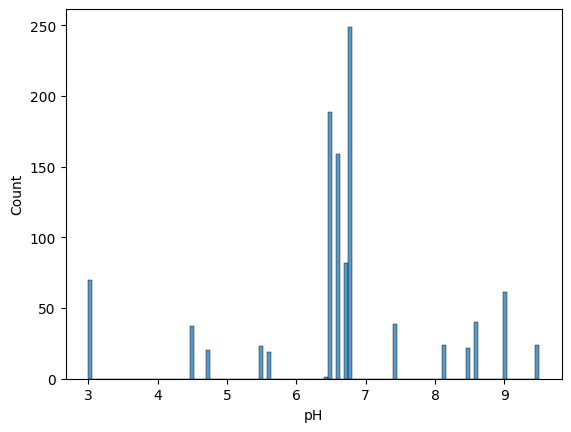

In [19]:
sns.histplot(data['pH'])

<AxesSubplot: xlabel='pH', ylabel='Density'>

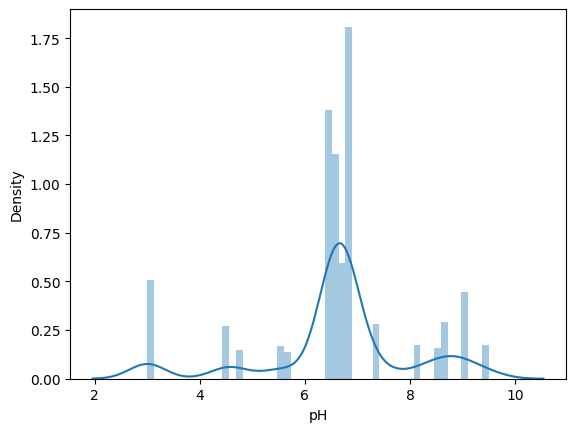

In [20]:
sns.distplot(data['pH'])

<AxesSubplot: xlabel='pH'>

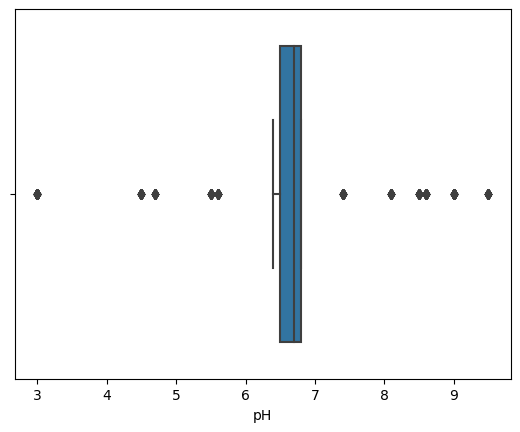

In [21]:
sns.boxplot(data['pH'])

<AxesSubplot: xlabel='Temprature', ylabel='Count'>

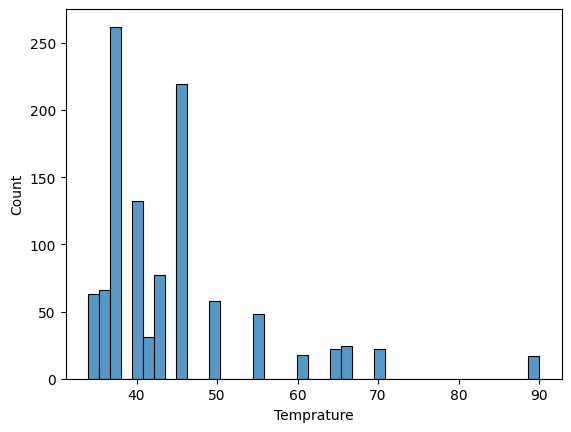

In [22]:
sns.histplot(data['Temprature'])

<AxesSubplot: xlabel='Temprature', ylabel='Density'>

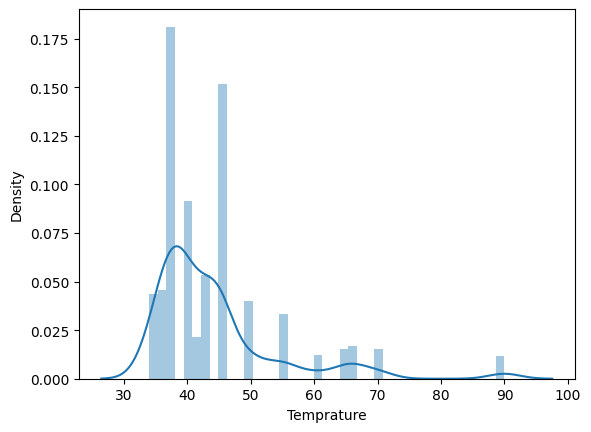

In [23]:
sns.distplot(data['Temprature'])

<AxesSubplot: xlabel='Temprature'>

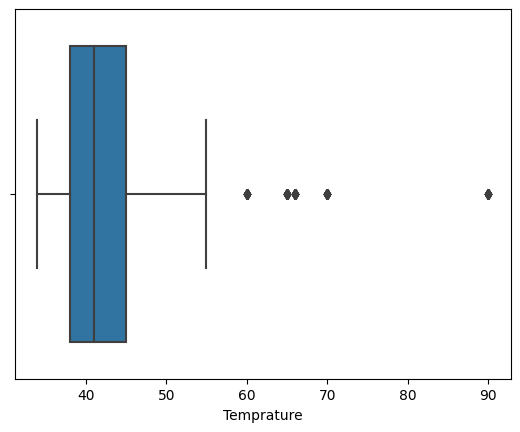

In [24]:
sns.boxplot(data['Temprature'])

<AxesSubplot: xlabel='Taste', ylabel='Count'>

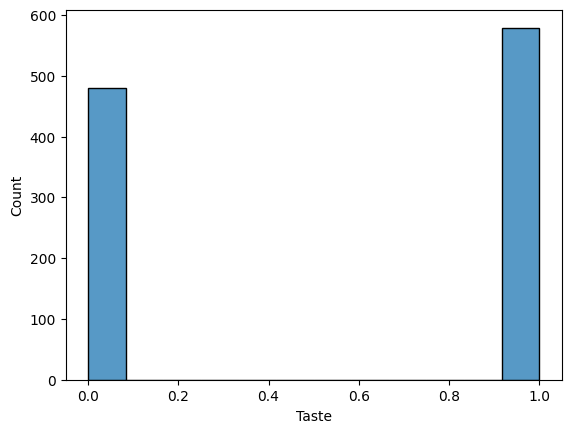

In [25]:
sns.histplot(data['Taste'])

<AxesSubplot: xlabel='Taste', ylabel='Density'>

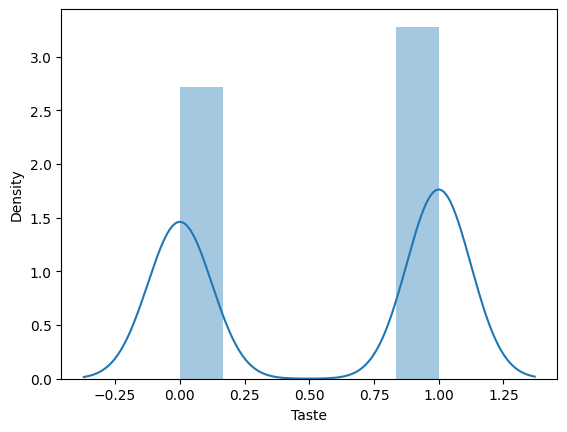

In [26]:
sns.distplot(data['Taste'])

<AxesSubplot: xlabel='Taste'>

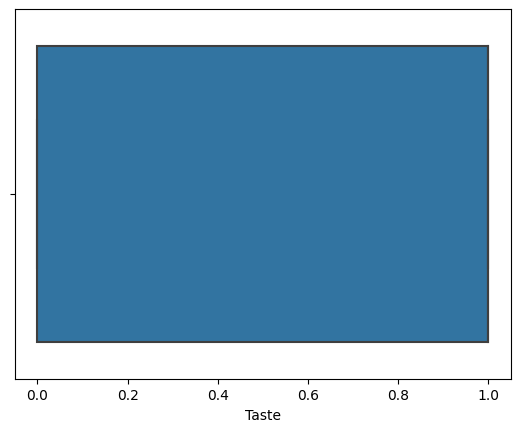

In [27]:
sns.boxplot(data['Taste'])

<AxesSubplot: xlabel='Odor', ylabel='Count'>

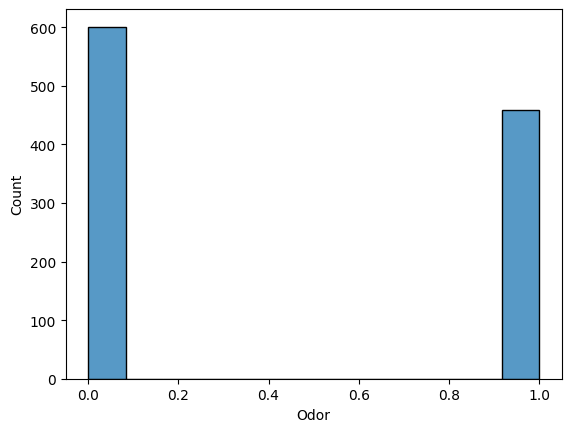

In [28]:
sns.histplot(data['Odor'])

<AxesSubplot: xlabel='Odor', ylabel='Density'>

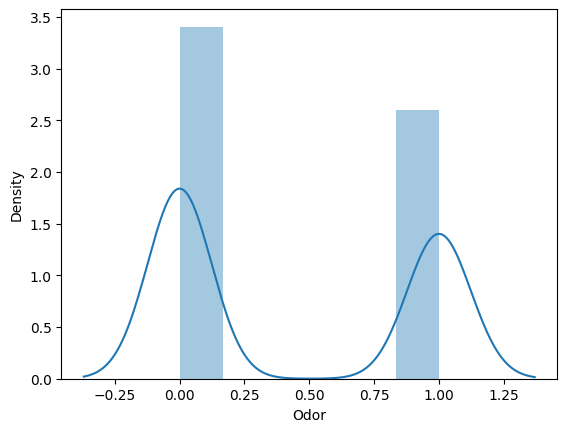

In [29]:
sns.distplot(data['Odor'])

<AxesSubplot: xlabel='Odor'>

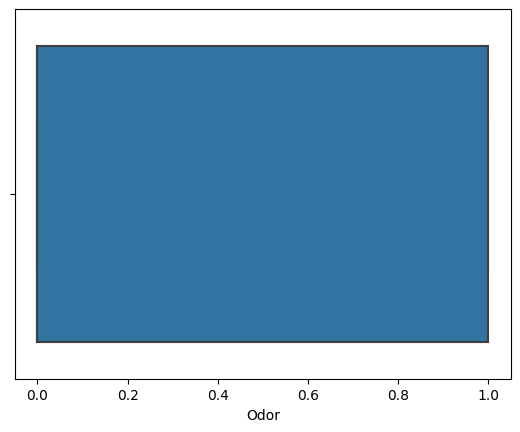

In [30]:
sns.boxplot(data['Odor'])

<AxesSubplot: xlabel='Turbidity', ylabel='Count'>

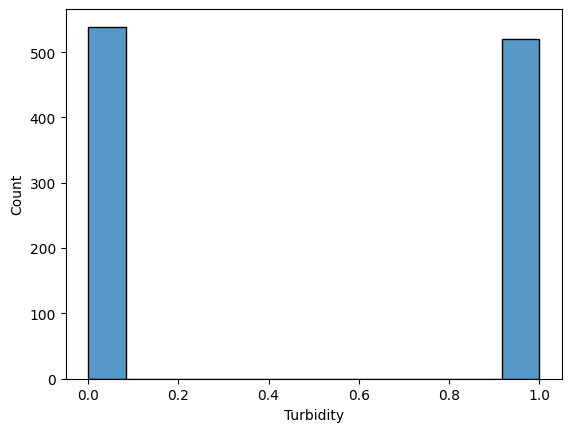

In [31]:
sns.histplot(data['Turbidity'])

<AxesSubplot: xlabel='Turbidity', ylabel='Density'>

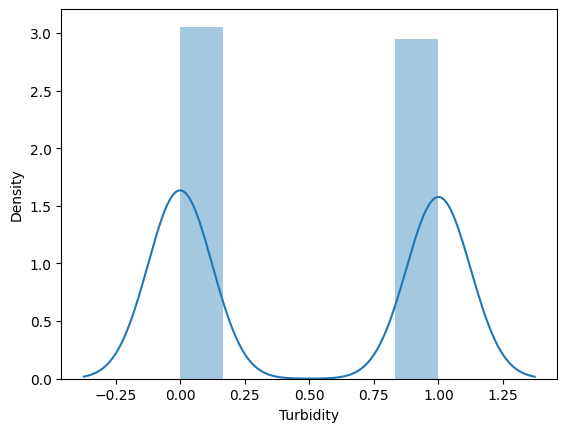

In [32]:
sns.distplot(data['Turbidity'])

<AxesSubplot: xlabel='Turbidity'>

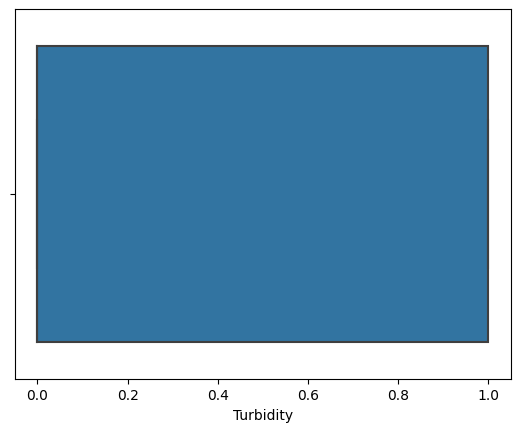

In [33]:
sns.boxplot(data['Turbidity'])

<AxesSubplot: xlabel='Colour', ylabel='Count'>

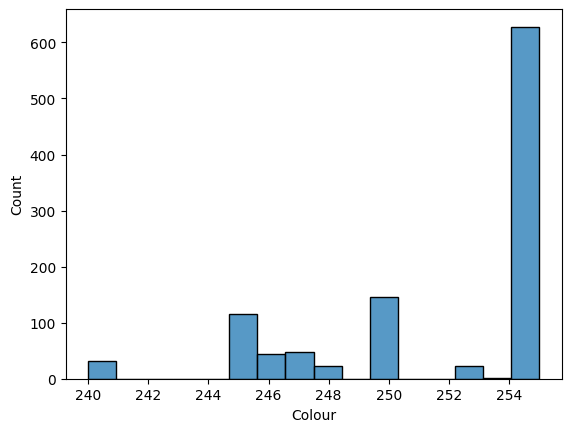

In [34]:
sns.histplot(data['Colour'])

<AxesSubplot: xlabel='Colour', ylabel='Density'>

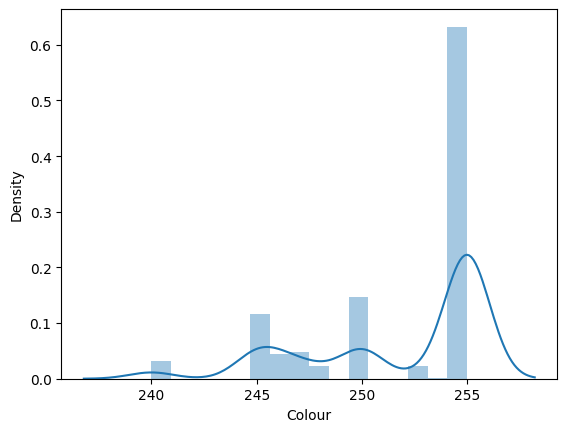

In [35]:
sns.distplot(data['Colour'])

<AxesSubplot: xlabel='Colour'>

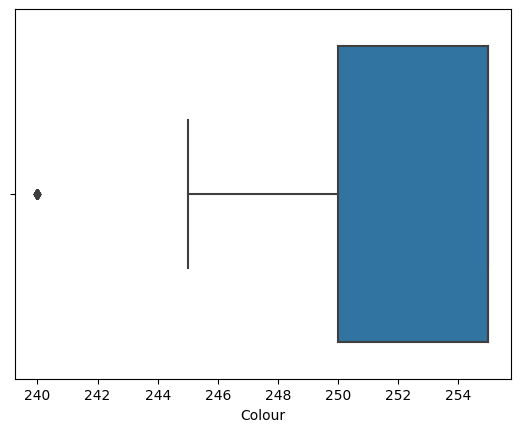

In [36]:
sns.boxplot(data['Colour'])

<AxesSubplot: xlabel='Grade', ylabel='Count'>

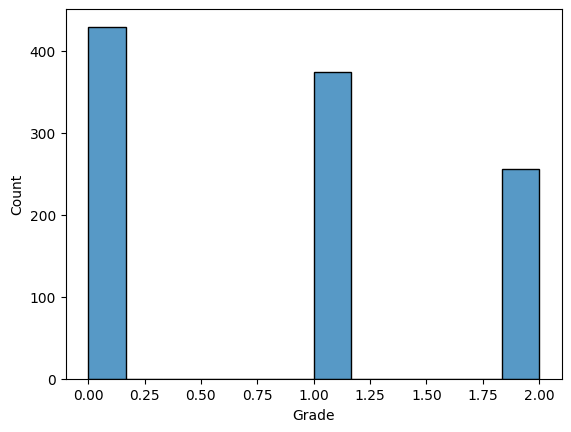

In [37]:
sns.histplot(data['Grade'])

<AxesSubplot: xlabel='Grade', ylabel='Density'>

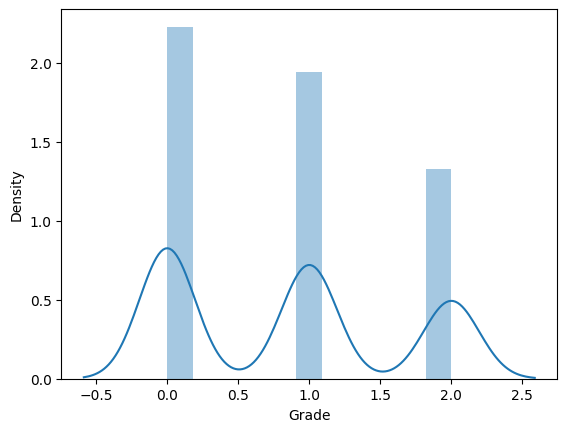

In [38]:
sns.distplot(data['Grade'])

<AxesSubplot: xlabel='Grade'>

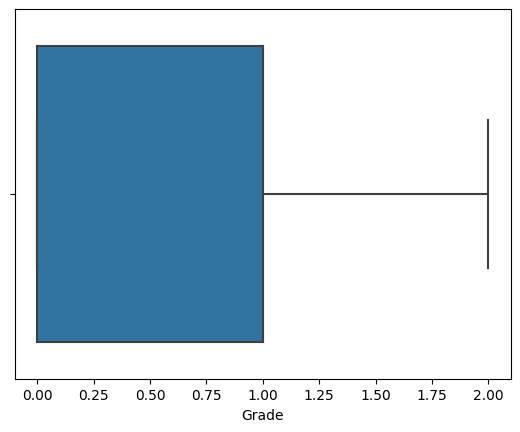

In [39]:
sns.boxplot(data['Grade'])

<AxesSubplot: >

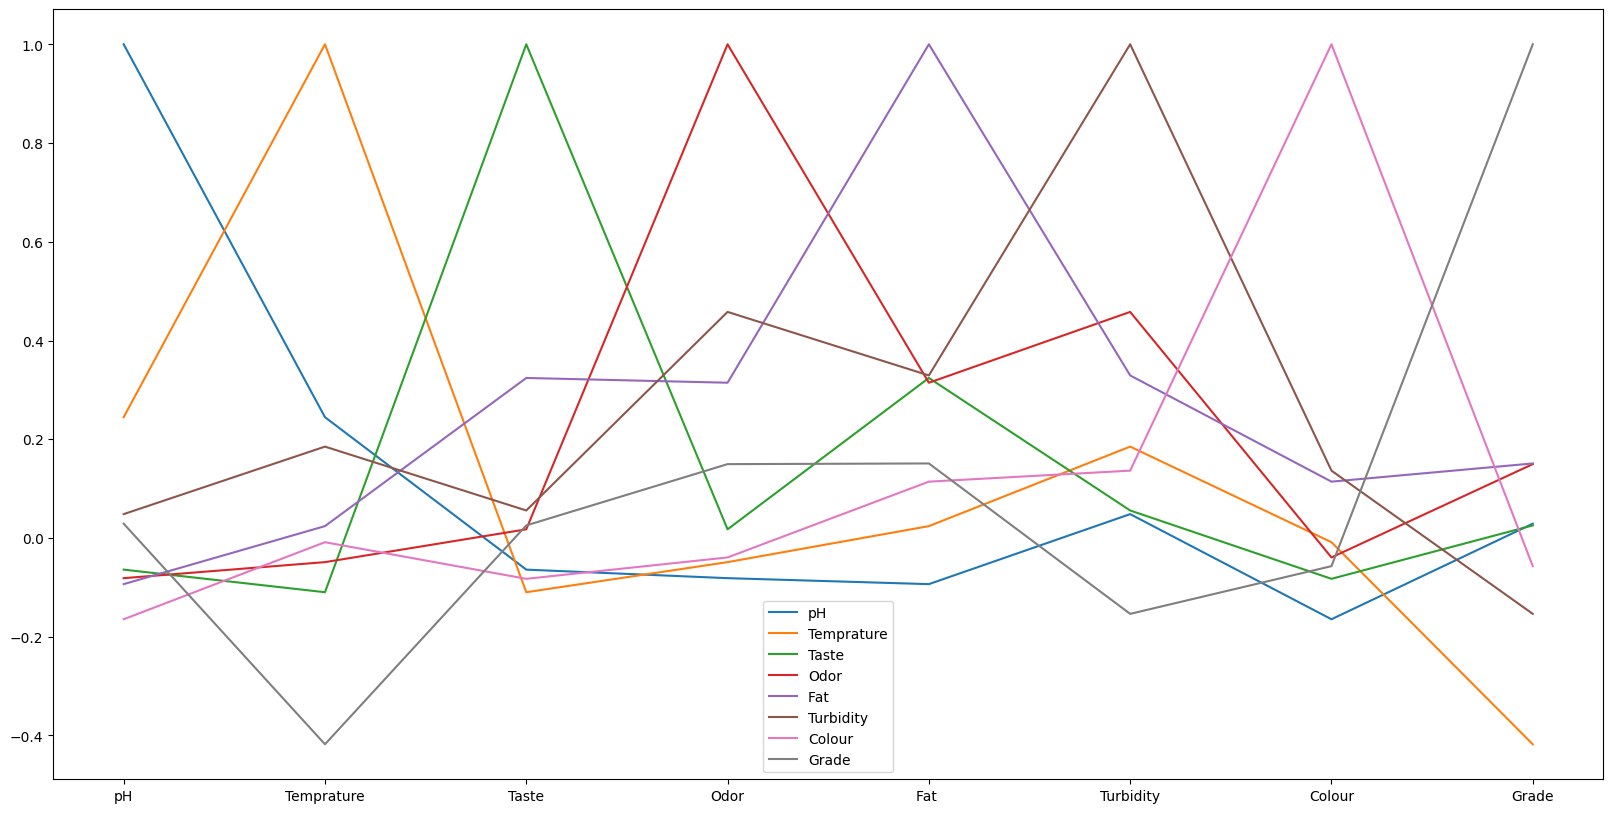

In [41]:
#plot correation 
data_corr = data.corr()
data_corr.plot(figsize=(20,10))

<AxesSubplot: >

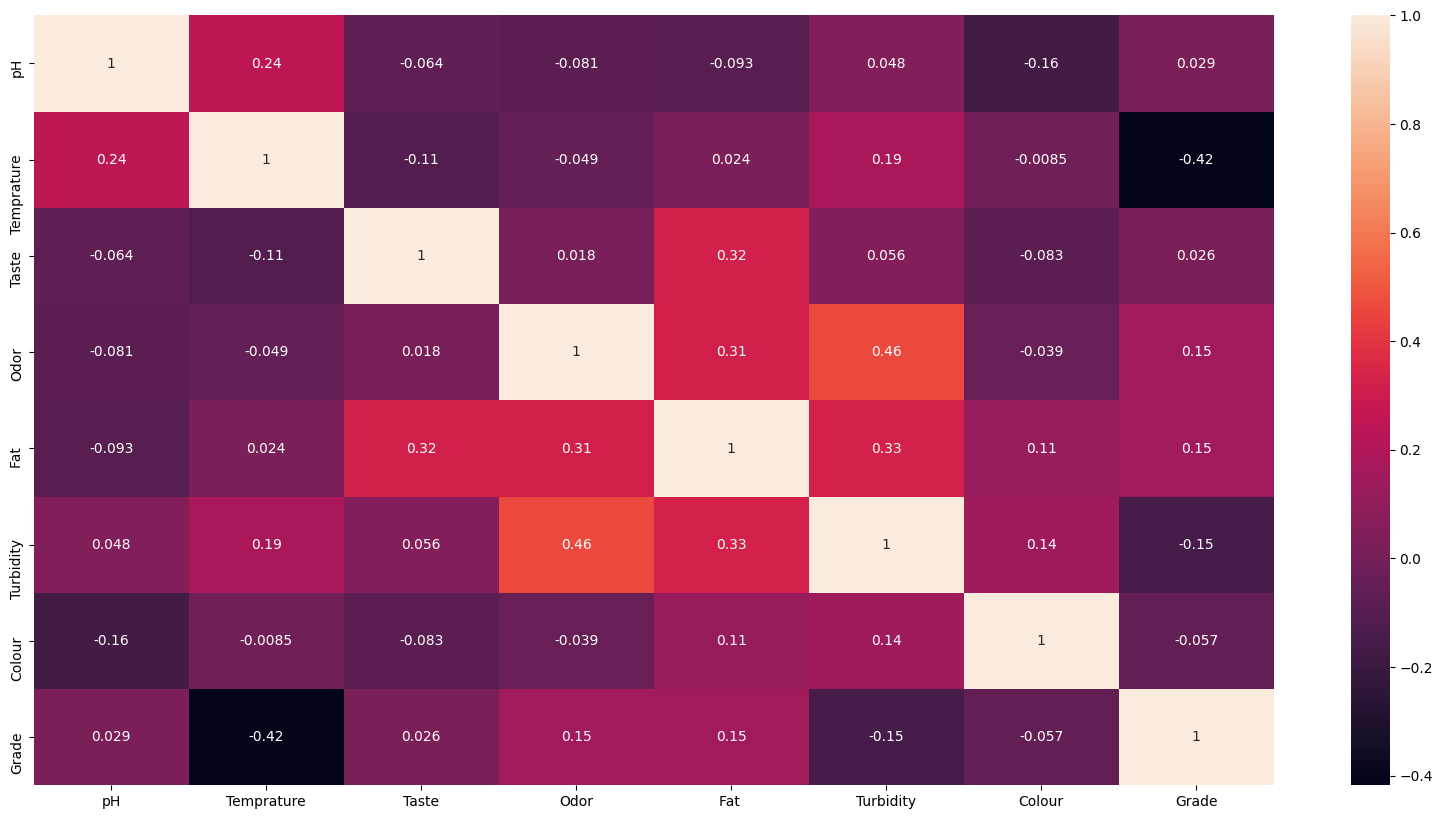

In [42]:
#plot heatmap 
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)

I check for null values.

In [43]:
pd.isnull(data).sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

I don't need to fill in missing value as there is no null value.

### Value Analysis With Graphs

I'm creating charts to examine how variables relate to "Grade".

Text(0.5, 1.0, 'Grade Based on pH')

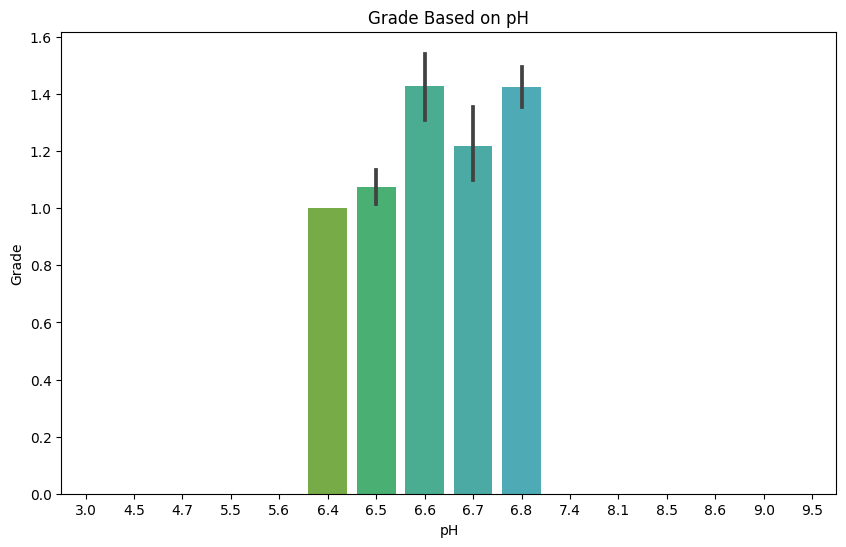

In [45]:
fig, ax = plt.subplots(figsize=(10, 6)) 
sns.barplot(data=data, x="pH", y="Grade", ax=ax) 
plt.title('Grade Based on pH')

Text(0.5, 1.0, 'Grade Based on Temprature')

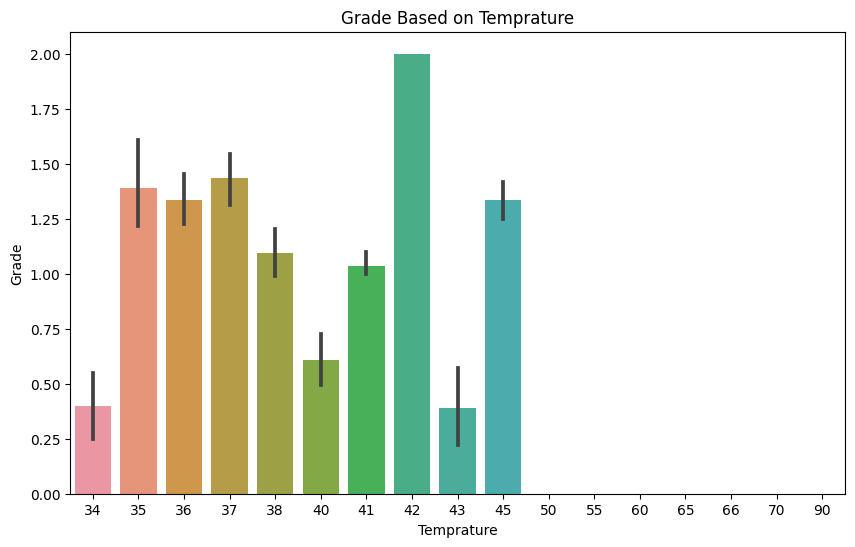

In [46]:
fig, ax = plt.subplots(figsize=(10, 6)) 
sns.barplot(data=data, x="Temprature", y="Grade", ax=ax) 
plt.title('Grade Based on Temprature')

Text(0.5, 1.0, 'Grade Based on Taste')

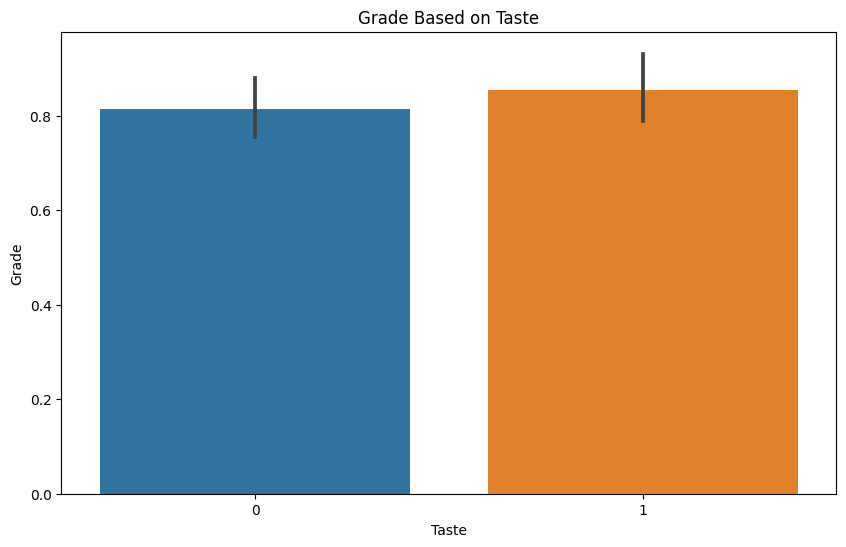

In [47]:
fig, ax = plt.subplots(figsize=(10, 6)) 
sns.barplot(data=data, x="Taste", y="Grade", ax=ax) 
plt.title('Grade Based on Taste')

<AxesSubplot: ylabel='Taste'>

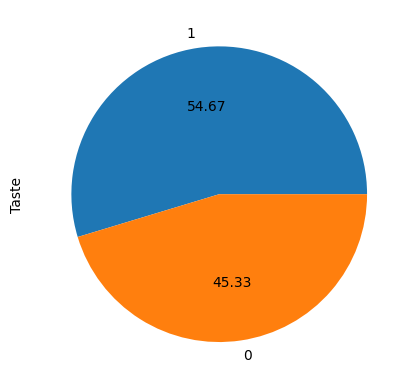

In [48]:
data['Taste'].value_counts().plot(kind='pie',autopct='%.2f')

Text(0.5, 1.0, 'Grade Based on Odor')

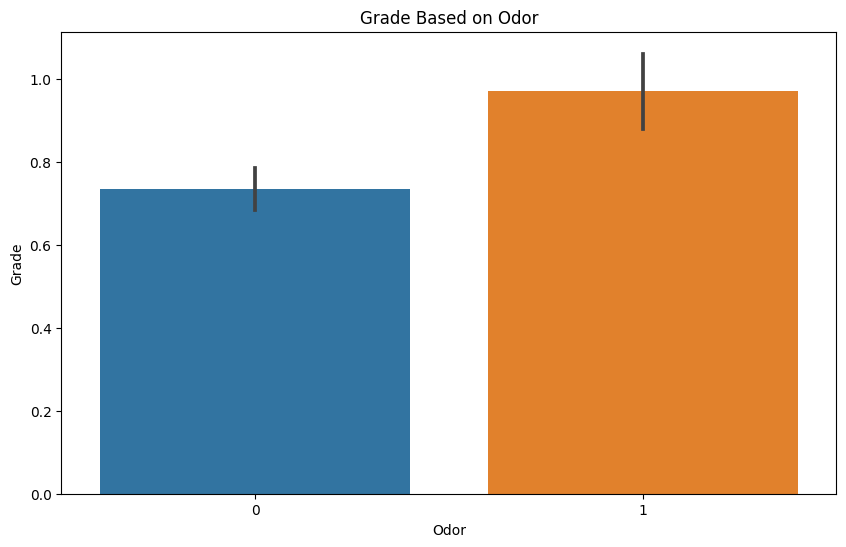

In [49]:
fig, ax = plt.subplots(figsize=(10, 6)) 
sns.barplot(data=data, x="Odor", y="Grade", ax=ax) 
plt.title('Grade Based on Odor')

<AxesSubplot: ylabel='Odor'>

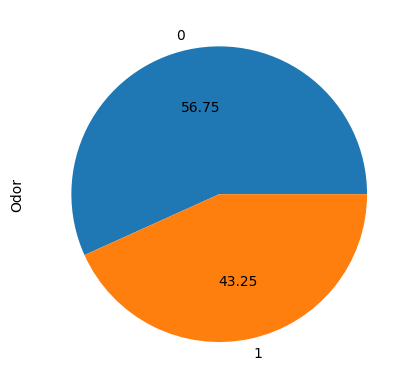

In [50]:
data['Odor'].value_counts().plot(kind='pie',autopct='%.2f')

Text(0.5, 1.0, 'Grade Based on Fat')

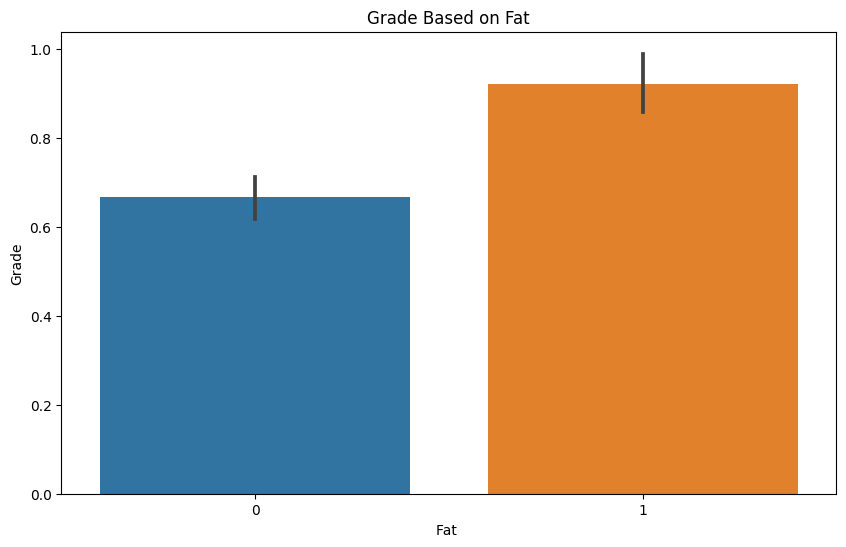

In [51]:
fig, ax = plt.subplots(figsize=(10, 6)) 
sns.barplot(data=data, x="Fat ", y="Grade", ax=ax) 
plt.title('Grade Based on Fat')


<AxesSubplot: ylabel='Grade'>

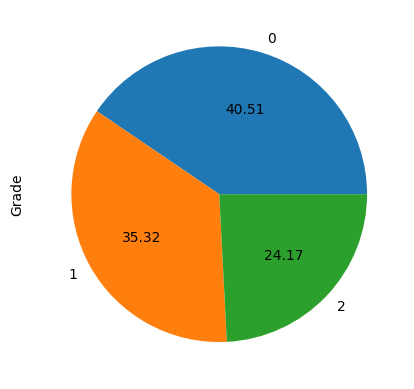

In [52]:
data['Grade'].value_counts().plot(kind='pie',autopct='%.2f')

Text(0.5, 1.0, 'Grade Based on Turbidity')

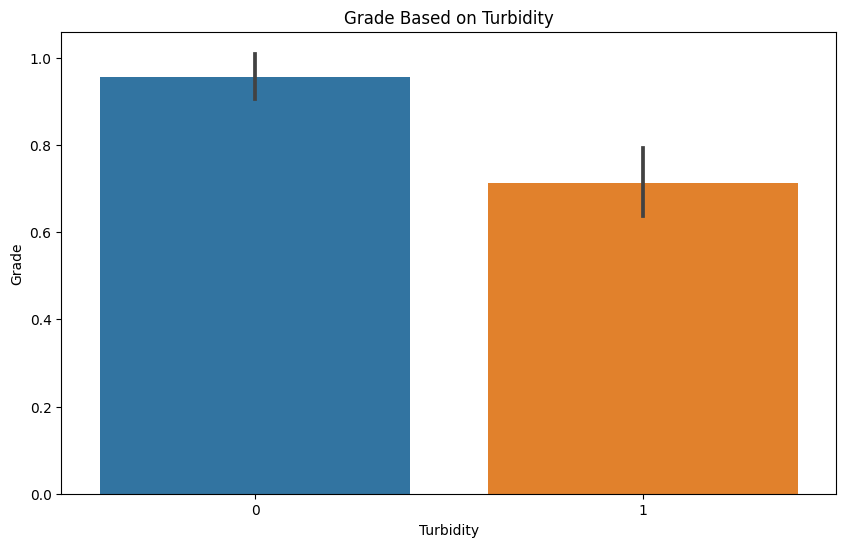

In [53]:
fig, ax = plt.subplots(figsize=(10, 6)) 
sns.barplot(data=data, x="Turbidity", y="Grade", ax=ax) 
plt.title('Grade Based on Turbidity')

<AxesSubplot: ylabel='Turbidity'>

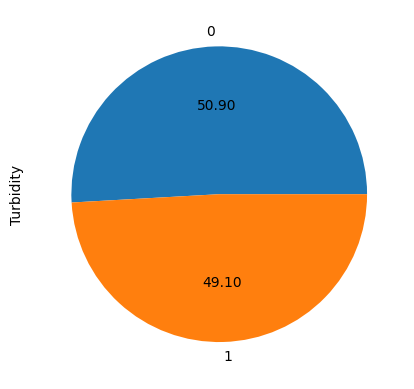

In [54]:
data['Turbidity'].value_counts().plot(kind='pie',autopct='%.2f')

Text(0.5, 1.0, 'Grade Based on Colour')

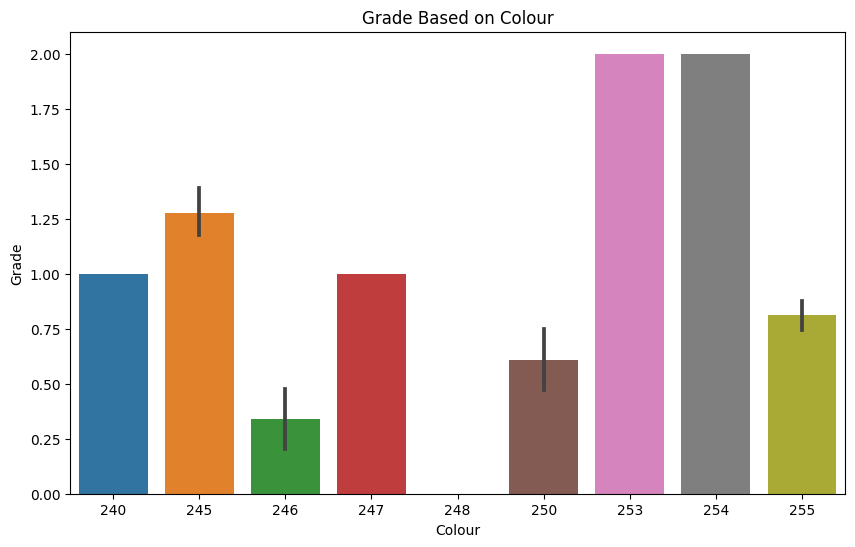

In [55]:
fig, ax = plt.subplots(figsize=(10, 6)) 
sns.barplot(data=data, x="Colour", y="Grade", ax=ax) 
plt.title('Grade Based on Colour')

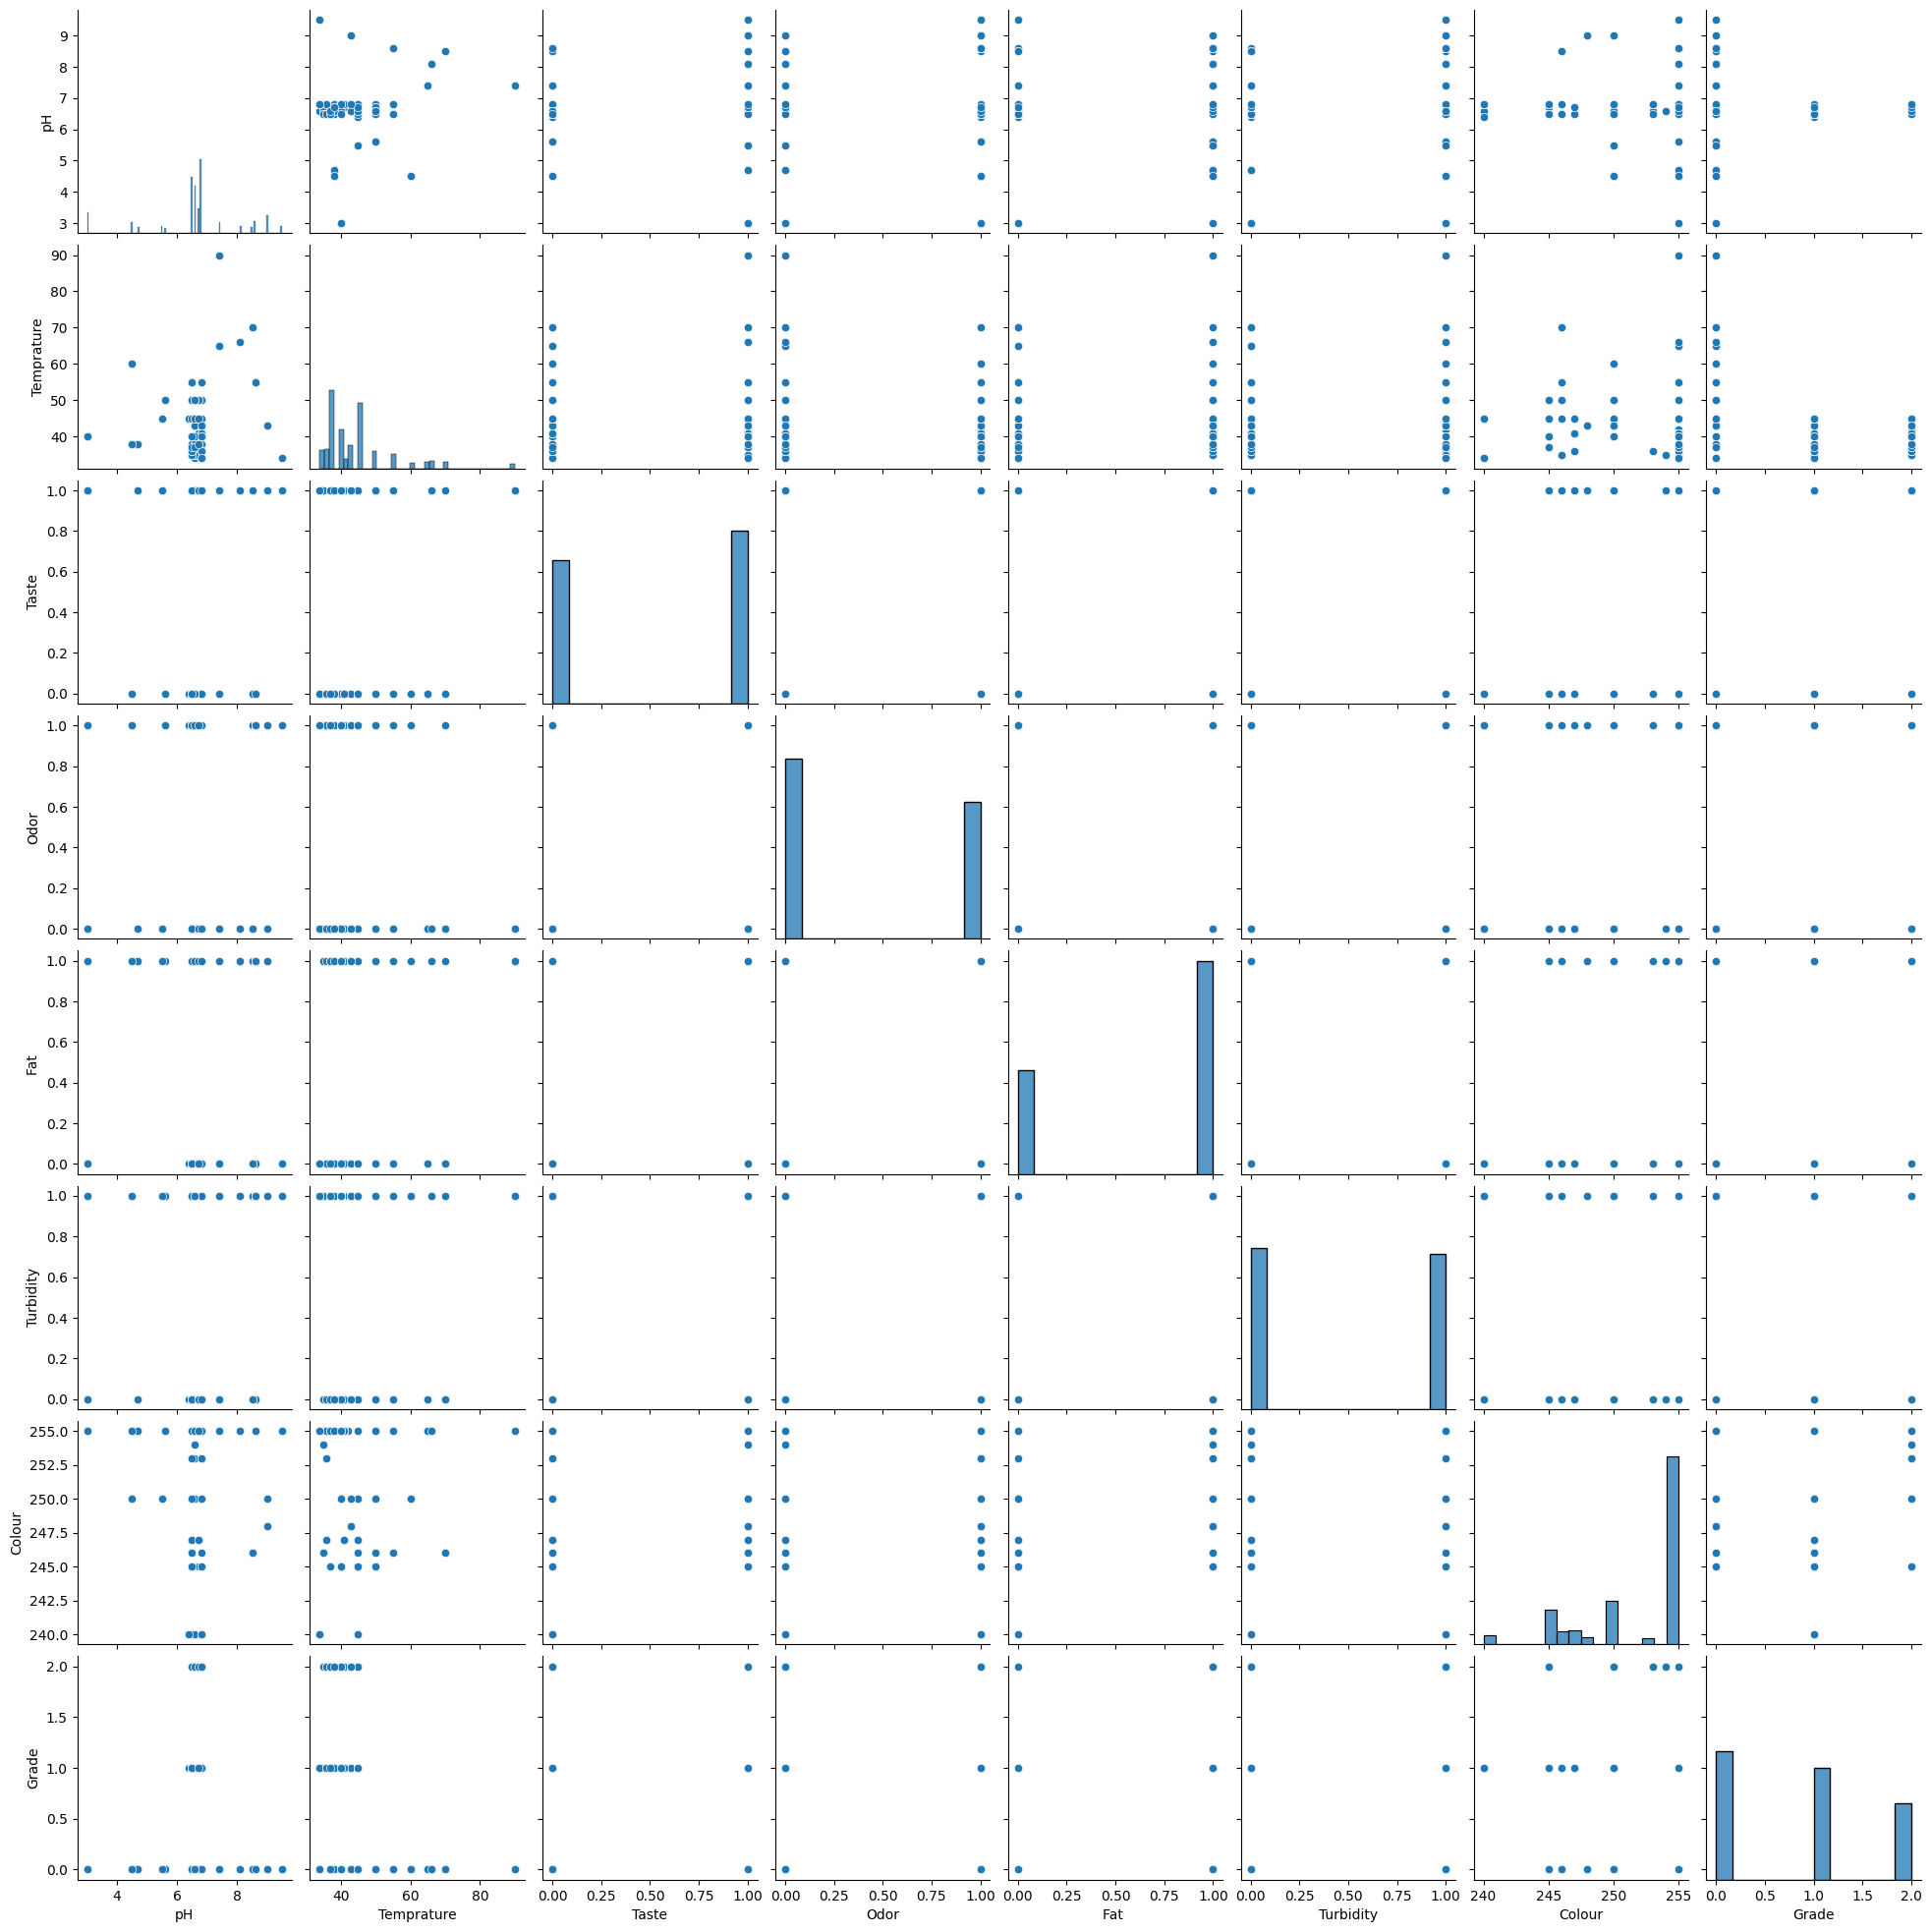

In [56]:
sns.pairplot(data)

<AxesSubplot: xlabel='Taste', ylabel='Temprature'>

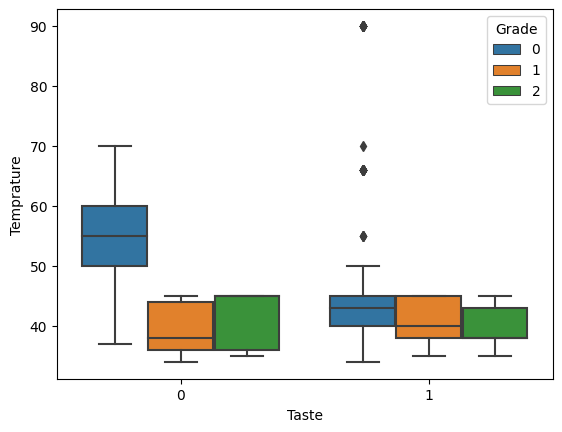

In [57]:
sns.boxplot(data['Taste'],data['Temprature'],hue=data['Grade'])

<AxesSubplot: xlabel='Taste', ylabel='Colour'>

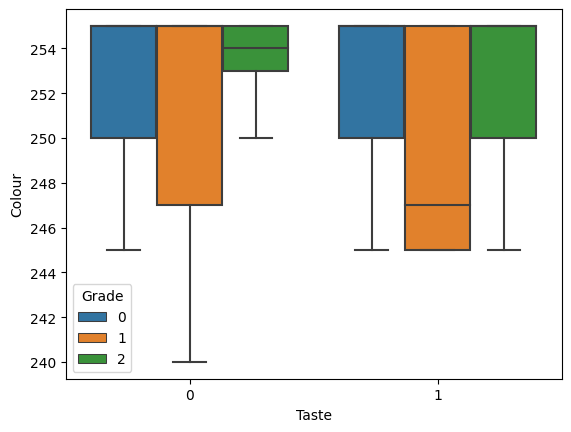

In [58]:
sns.boxplot(data['Taste'],data['Colour'],hue=data['Grade'])

<AxesSubplot: xlabel='Odor', ylabel='Colour'>

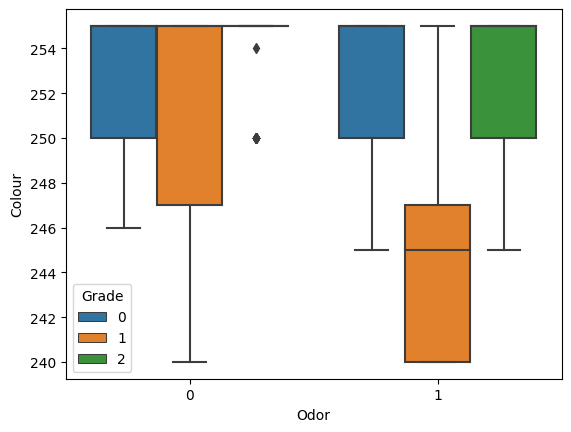

In [59]:
sns.boxplot(data['Odor'],data['Colour'],hue=data['Grade'])

<AxesSubplot: xlabel='Turbidity', ylabel='Colour'>

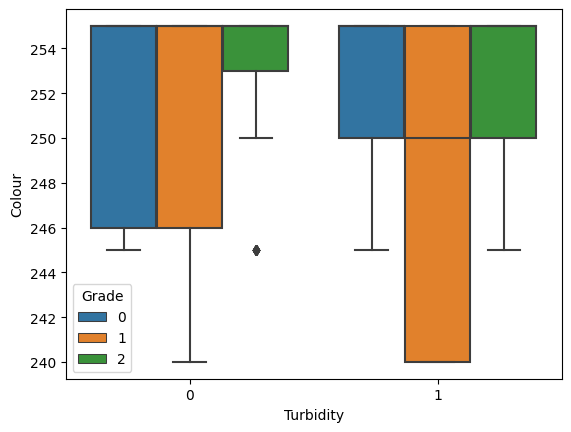

In [60]:
sns.boxplot(data['Turbidity'],data['Colour'],hue=data['Grade'])

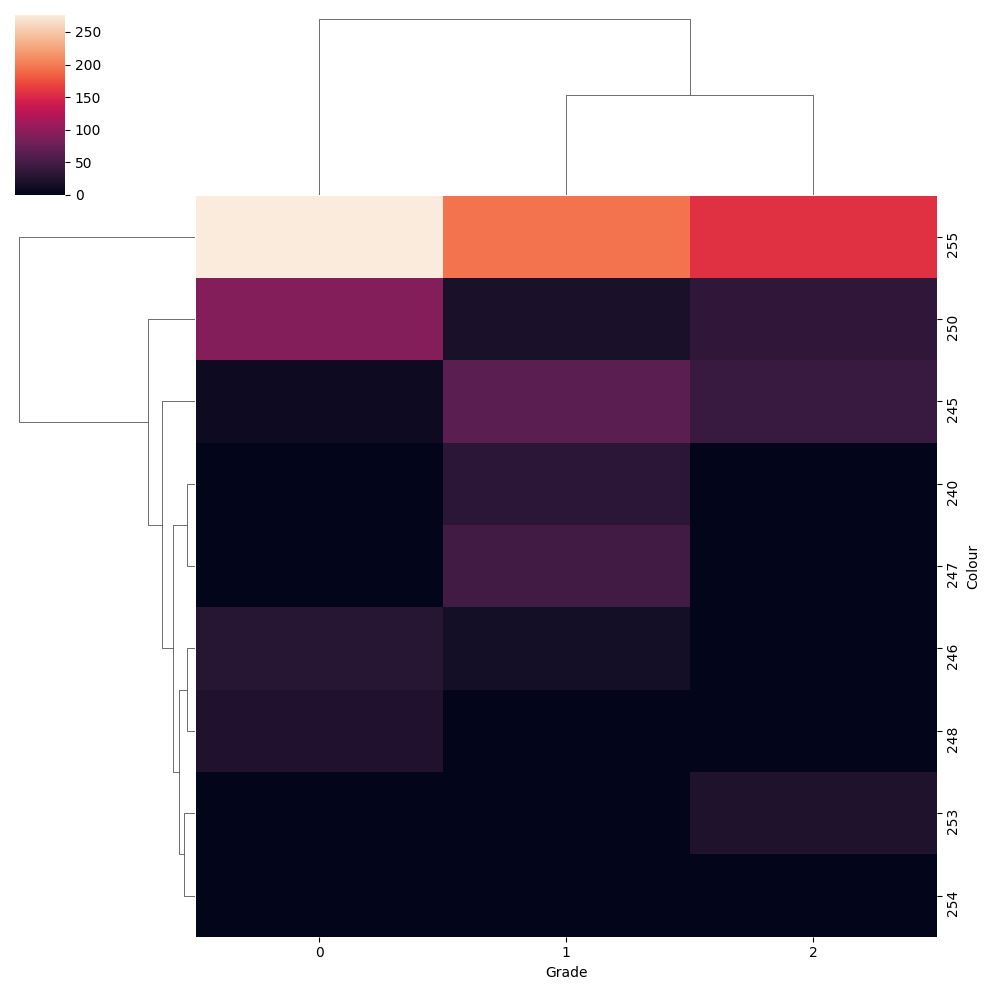

In [61]:
sns.clustermap(pd.crosstab(data['Colour'],data['Grade']))

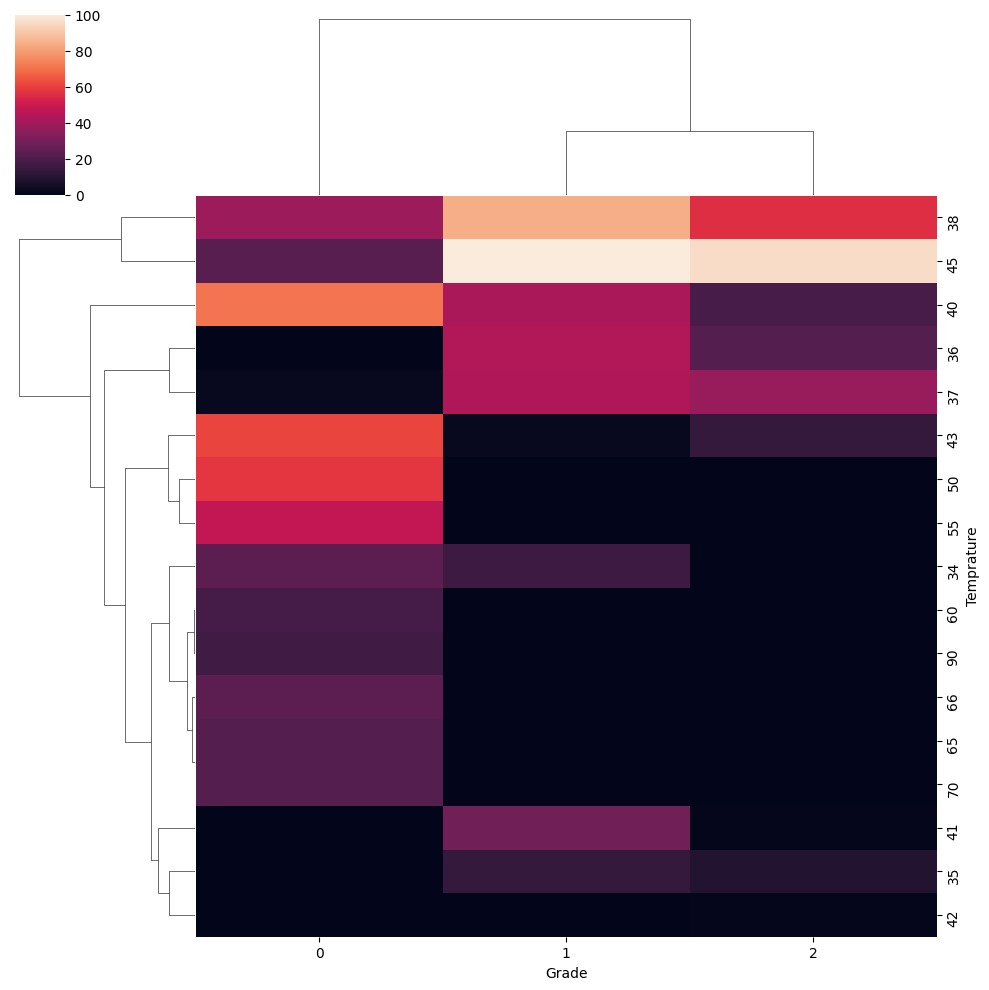

In [62]:
sns.clustermap(pd.crosstab(data['Temprature'],data['Grade']))

In [63]:
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


<AxesSubplot: xlabel='Grade', ylabel='Taste'>

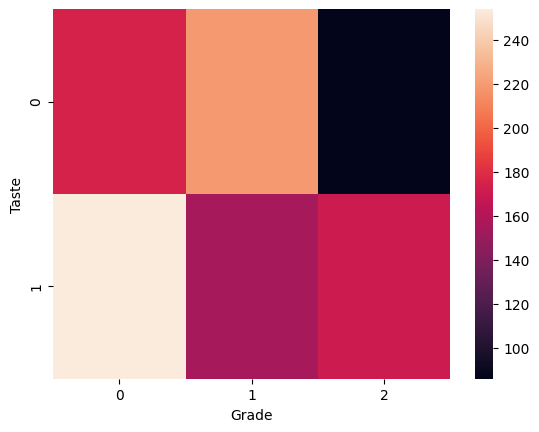

In [64]:
 sns.heatmap(pd.crosstab(data['Taste'],data['Grade']))

<AxesSubplot: xlabel='Grade', ylabel='Odor'>

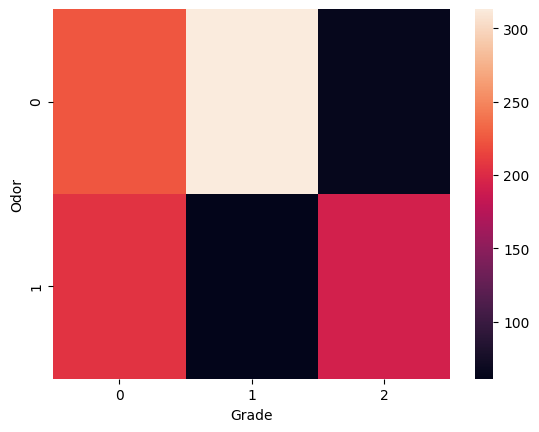

In [65]:
sns.heatmap(pd.crosstab(data['Odor'],data['Grade']))

<AxesSubplot: xlabel='Grade', ylabel='Turbidity'>

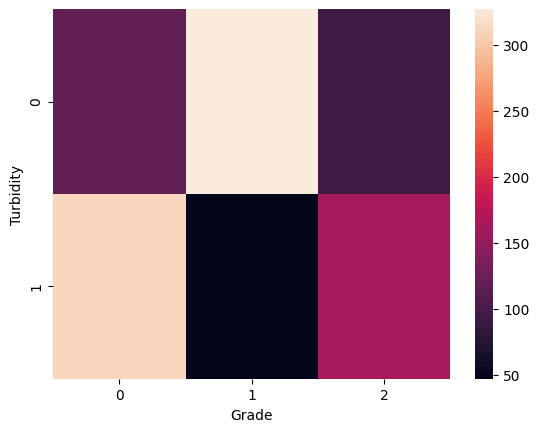

In [66]:
sns.heatmap(pd.crosstab(data['Turbidity'],data['Grade']))

### Modelling

I'm installing the necessary packages for estimation.

In [69]:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

I split the columns for test and train.

In [70]:
x=data.iloc[:,:7] 
x.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255


In [71]:
y=data.iloc[:,7] 
y.head()

0    2
1    2
2    0
3    0
4    1
Name: Grade, dtype: int64

In [72]:
type(data)

pandas.core.frame.DataFrame

Next I define 80% of the dataframe for training and 20% of the dataframe for testing.

### Logistic Regression

In [81]:
LR = LogisticRegression() 
LR.fit(x_train,y_train)

LogisticRegression()

In [82]:
y_predicts =LR.predict(x_test) 
y_predicts

array([0, 0, 0, 2, 0, 1, 2, 1, 0, 0, 0, 0, 2, 0, 2, 1, 1, 2, 2, 0, 1, 1,
       1, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 1, 2, 1,
       2, 2, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0, 1, 2, 0, 1, 1, 1, 1, 2,
       1, 1, 0, 1, 0, 1, 0, 2, 2, 2, 1, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2, 0, 0, 2, 0, 1, 2, 0, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 1, 0, 2, 1,
       1, 1, 1, 1, 0, 1, 2, 1, 1, 2, 2, 2, 2, 1, 0, 2, 0, 0, 1, 1, 1, 1,
       2, 1, 0, 2, 2, 1, 1, 0, 0, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2, 1, 1, 1,
       0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       2, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 2, 0, 2])

In [83]:
print(confusion_matrix(y_test, y_predicts))

[[62 11 11]
 [ 4 62  7]
 [16 12 27]]


In [84]:
LR.score(x_train,y_train)

0.7142857142857143

In [85]:
LR.score(x_test,y_test)

0.7122641509433962

In [86]:
LR_Predict = LR.predict(x_train)
LR_Accuracy = accuracy_score(y_train, LR_Predict) 
print("Accuracy: " + str(LR_Accuracy))

Accuracy: 0.7142857142857143


In [87]:
resultLR = classification_report(y_test, y_predicts)
print(resultLR)

              precision    recall  f1-score   support

           0       0.76      0.74      0.75        84
           1       0.73      0.85      0.78        73
           2       0.60      0.49      0.54        55

    accuracy                           0.71       212
   macro avg       0.70      0.69      0.69       212
weighted avg       0.71      0.71      0.71       212



### Random Forest Classifier

In [88]:
x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=0.2) 
x_train.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
474,6.6,43,1,0,1,1,250
900,8.6,55,0,1,1,1,255
726,6.6,45,0,1,1,1,250
767,6.5,38,1,0,1,0,255
669,4.5,60,0,1,1,1,250


In [89]:
RFC = RandomForestClassifier() 
RFC.fit(x_train, y_train)

RandomForestClassifier()

In [90]:
y_predicts =RFC.predict(x_test) 
y_predicts

array([1, 2, 2, 2, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 2,
       2, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 0,
       0, 2, 0, 0, 2, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 2, 2, 1, 0, 1,
       1, 2, 0, 2, 2, 0, 1, 2, 0, 0, 2, 0, 2, 0, 1, 0, 2, 2, 2, 0, 0, 1,
       2, 0, 0, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1, 0, 0, 0, 2, 2, 1, 1, 0, 0,
       0, 0, 2, 2, 0, 0, 1, 1, 0, 1, 1, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       0, 2, 0, 1, 0, 2, 0, 2, 1, 2, 0, 1, 0, 0, 1, 0, 2, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 2, 2, 2, 1, 0, 2, 0, 1, 0, 2, 2, 2, 0, 0, 1, 0, 1, 1,
       1, 2, 2, 0, 1, 1, 0, 0, 2, 0, 2, 2, 0, 0])

In [91]:
print(confusion_matrix(y_test, y_predicts))

[[79  0  0]
 [ 0 79  0]
 [ 0  0 54]]


In [92]:
RFC.score(x_train,y_train)

1.0

In [93]:
RFC.score(x_test,y_test)

1.0

In [94]:
resultRFC = classification_report(y_test, y_predicts) 
print(resultRFC)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        79
           2       1.00      1.00      1.00        54

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



In [95]:
RFC_Predict = RFC.predict(x_train)
RFC_Accuracy = accuracy_score(y_train, RFC_Predict) 
print("Accuracy: " + str(RFC_Accuracy))

Accuracy: 1.0


### K-Nearest Neighbors Classifier

In [96]:
x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=0.2) 
x_train.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
1003,4.7,38,1,0,1,0,255
771,8.6,55,0,1,1,1,255
392,6.6,45,0,1,1,1,250
929,6.5,36,0,0,0,0,247
956,7.4,65,0,0,0,0,255


In [98]:
KNN = KNeighborsClassifier() 
KNN.fit(x_train, y_train)

KNeighborsClassifier()

In [99]:
y_predicts =KNN.predict(x_test) 
y_predicts

array([0, 0, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 0, 1, 0, 0, 1, 2, 2, 2, 1, 0,
       0, 2, 0, 1, 1, 2, 0, 0, 1, 0, 2, 1, 0, 2, 0, 1, 0, 1, 0, 0, 1, 2,
       1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 2, 2, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0,
       0, 0, 2, 0, 0, 2, 1, 1, 0, 1, 0, 2, 1, 0, 2, 0, 0, 2, 0, 1, 2, 1,
       0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0,
       1, 2, 2, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 2, 1,
       2, 1, 0, 1, 1, 1, 2, 0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 0, 1, 1, 0, 1, 1, 1, 2,
       1, 0, 2, 2, 0, 0, 2, 0, 0, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 1, 0])

In [100]:
print(confusion_matrix(y_test, y_predicts))

[[88  1  0]
 [ 0 68  0]
 [ 0  0 55]]


In [101]:
KNN.score(x_train,y_train)

0.9929161747343566

In [102]:
KNN.score(x_test,y_test)

0.9952830188679245

In [103]:
resultKNN = classification_report(y_test, y_predicts) 
print(resultKNN)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        89
           1       0.99      1.00      0.99        68
           2       1.00      1.00      1.00        55

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



In [104]:
KNN_Predict = KNN.predict(x_train)
KNN_Accuracy = accuracy_score(y_train, KNN_Predict) 
print("Accuracy: " + str(KNN_Accuracy))

Accuracy: 0.9929161747343566


### Decision Tree Classifier

In [105]:
x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=0.2) 
x_train.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
662,4.7,38,1,0,1,0,255
57,8.6,55,0,1,1,1,255
774,6.5,38,1,0,0,0,255
742,6.8,45,0,1,1,1,255
614,6.8,38,0,0,0,0,255


In [106]:
DT = DecisionTreeClassifier() 
DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [107]:
y_predicts =DT.predict(x_test) 
y_predicts

array([0, 1, 0, 1, 1, 1, 1, 2, 0, 1, 0, 2, 1, 1, 2, 0, 2, 1, 2, 0, 0, 1,
       2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 2, 2, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 1, 0, 0, 1, 2,
       0, 0, 1, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 1, 2, 0, 2, 0,
       1, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0,
       2, 2, 2, 1, 0, 0, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 0, 0,
       0, 1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 2, 2, 1, 1, 1, 2, 2, 2, 0, 1, 2, 1, 0, 1, 0, 0, 2, 0,
       1, 0, 1, 2, 2, 2, 1, 2, 0, 1, 0, 1, 2, 1, 0, 2, 1, 1, 0, 1, 1, 1,
       0, 2, 0, 1, 0, 0, 1, 2, 0, 1, 1, 2, 0, 0])

In [108]:
print(confusion_matrix(y_test, y_predicts))

[[82  0  0]
 [ 0 78  0]
 [ 1  1 50]]


In [109]:
DT.score(x_train,y_train)

1.0

In [110]:
DT.score(x_test,y_test)

0.9905660377358491

In [111]:
resultDT = classification_report(y_test, y_predicts) 
print(resultDT)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        82
           1       0.99      1.00      0.99        78
           2       1.00      0.96      0.98        52

    accuracy                           0.99       212
   macro avg       0.99      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212



In [112]:
DT_Predict = DT.predict(x_train)
DT_Accuracy = accuracy_score(y_train, DT_Predict) 
print("Accuracy: " + str(DT_Accuracy))

Accuracy: 1.0


### Model Performance Summary

I created a list where I could review model performances and compared them.

In [ ]:
# LR
# Accuracy: 0.7142857142857143
    
# RFC
# Accuracy: 1.0
    
# KNC
# Accuracy: 0.9929161747343566
    
# DTC
# Accuracy: 1.0

In [126]:
model_performance_accuracy = pd.DataFrame({'Model': ['LogisticRegression', 'RandomForestClassifier', 'KNeighborsClassifier', 'DeccisionTreeClassifier'],  
                                          'Accuracy' : [0.7142857142857143, 1.0, 0.9929161747343566, 1.0]})
  

In [127]:
model_performance_accuracy.sort_values(by = "Accuracy", ascending = False)


,Model,Accuracy
1,RandomForestClassifier,1.000000
3,DeccisionTreeClassifier,1.000000
2,KNeighborsClassifier,0.992916
0,LogisticRegression,0.714286


In [116]:
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


Now you can learn the quality of the milk you will obtain by entering the values you want respectively.


In [117]:
output=RFC.predict([[6.6,1,1,1,1,1,240]])

In [119]:
if output == 2:
    print("The milk quality is 'Good'")
if output == 1:
    print("The milk quality is 'Moderate'")
if output == 0:
    print("The milk quality is 'Bad'")

The milk quality is 'Good'
